# Introduction

## This project aims to answer the following question: By monitoring weather data of Beirut over 2012 and 2014, are the effects of climate change clearly seen? Comparing it to another area of Lebanon having slightly different weather conditions in each season, are these effects the same?

## To answer the question, I've managed to get the weather data of both Fanar (Beirut), and Tal Amara (Rayak) from the Lebanese Agricultural Research Institute (LARI). Both regions have slightly different temperature ranges in each season. (E.g.: Temperatures in Tal Amara, Bekaa during the winter goes from -6°C to 18°C, whilst in Fanar, Beirut it goes from nearly 5°C to 25°C).
## Fanar is about 7 km away from the coastal capital, and close to the sea which results in high humidity percentage, whilst Tal Amara is about 60 km away, and the levels humidity are significantly lower. 

## I am going to clean the data and plot temperatures of both areas during the years of 2012 and 2014 and try to answer my question.

## 1. Importing Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime as dt
import calendar
%matplotlib notebook
dataPath = os.getcwd()+'\\weather_data'
# print(plt.style.available)
plt.style.use('seaborn')

## 2. Getting Data

In [23]:
df = pd.DataFrame()
for file in os.listdir(dataPath):
    # print(file)
    for subfile in os.listdir(dataPath+'\\'+file):
        subfilePath = dataPath+'\\'+file+'\\'+subfile
        # print(dataPath+'\\'+file+'\\'+subfile)
        subfileData = pd.ExcelFile(subfilePath)
        for sheet in subfileData.sheet_names:
            # print(sheet)
            tmpDf = pd.DataFrame()
            tmpDf = subfileData.parse(sheet)
            tmpDf['Month'] = sheet
            tmpDf['AreaYear'] = subfile
            tmpDf = tmpDf[3:]
            df = pd.concat([df, tmpDf])
            
df.to_excel('test.xlsx')
df = df.drop(columns={'Unnamed: 0', 'Precipitation [mm]', 'HC Air Temperature [°C]', ' Air temperature'}, axis=1)
df = df.rename(columns={'Precipitation': 'Precipitation [mm]', 'HC Air temperature': 'Average Temperature', 
                        'Unnamed: 3': 'Min Temperature', 
                        'Unnamed: 4': 'Max Temperature', 'Month': 'MonthName'})
# For some reason, dates from talamara2019 are filled with blank
datetime_index = pd.date_range('2019-01-01', periods=364, freq='D')
df.loc[df['AreaYear']=='talamara2019.xlsx', 'Date']=datetime_index
df['Date'] = pd.to_datetime(df['Date'])
df = df.reset_index(drop=True)
df = df[df['Date'].notna()]
df.head()

,Date,Precipitation [mm],Average Temperature,Min Temperature,Max Temperature,MonthName,AreaYear
0,2012-01-02,10,13.47,11.73,17.71,January,fanar2012.xlsx
1,2012-01-03,0,13.77,11.15,18.57,January,fanar2012.xlsx
2,2012-01-04,0,13.56,10.92,19.01,January,fanar2012.xlsx
3,2012-01-05,7,14.36,11,19.12,January,fanar2012.xlsx
4,2012-01-06,10,12.67,10.76,17.29,January,fanar2012.xlsx


## 3. Adding day, month, year fields and extracting area name from AreaYear

In [24]:
df['Day'] = pd.to_numeric(df['Date'].dt.day).astype(int)
df['MonthNbr'] = pd.to_numeric(df['Date'].dt.month).astype(int)
df['Year'] = pd.to_numeric(df['Date'].dt.year).astype(int)
df['MonthName'] = [calendar.month_name[nbr] for nbr in df['MonthNbr']]

# Getting area name
df['Area'] = np.where(df['AreaYear'].str.contains('tal'), 'Tal Amara, Bekaa', 'Fanar, Beirut')
df = df.drop(columns=['AreaYear'])
df[df['Area']=='Fanar, Beirut']

,Date,Precipitation [mm],Average Temperature,Min Temperature,Max Temperature,MonthName,Day,MonthNbr,Year,Area
0,2012-01-02,10,13.47,11.73,17.71,January,2,1,2012,"Fanar, Beirut"
1,2012-01-03,0,13.77,11.15,18.57,January,3,1,2012,"Fanar, Beirut"
2,2012-01-04,0,13.56,10.92,19.01,January,4,1,2012,"Fanar, Beirut"
3,2012-01-05,7,14.36,11,19.12,January,5,1,2012,"Fanar, Beirut"
4,2012-01-06,10,12.67,10.76,17.29,January,6,1,2012,"Fanar, Beirut"
...,...,...,...,...,...,...,...,...,...,...
985,2019-01-27,0.2,16.8,13.5,21.1,January,27,1,2019,"Fanar, Beirut"
986,2019-01-28,9.4,12.6,10.4,15,January,28,1,2019,"Fanar, Beirut"
987,2019-01-29,7.8,14.5,11.3,19.3,January,29,1,2019,"Fanar, Beirut"
988,2019-01-30,0,15.3,11.5,22.2,January,30,1,2019,"Fanar, Beirut"


In [25]:
df.isnull().sum()

Date                      0
Precipitation [mm]      364
Average Temperature    1074
Min Temperature           6
Max Temperature           6
MonthName                 0
Day                       0
MonthNbr                  0
Year                      0
Area                      0
dtype: int64

## 4. Removing text values from numeric fields

In [26]:
# print(col, df['Min Temperature'].value_counts())
# df['Min Temperature'].astype(str).str.isnumeric()
cols = ['Precipitation [mm]', 'Average Temperature', 'Min Temperature', 'Max Temperature']
for col in cols:
    df[col] = df[col].replace('MD', '')
    
# Converting fields into float
df['Min Temperature'] = pd.to_numeric(df['Min Temperature'], errors='coerce')
df['Max Temperature'] = pd.to_numeric(df['Max Temperature'], errors='coerce')
df['Average Temperature'] = pd.to_numeric(df['Average Temperature'], errors='coerce')
df['Precipitation [mm]'] = pd.to_numeric(df['Precipitation [mm]'], errors='coerce')

df.head()

,Date,Precipitation [mm],Average Temperature,Min Temperature,Max Temperature,MonthName,Day,MonthNbr,Year,Area
0,2012-01-02,10.0,13.47,11.73,17.71,January,2,1,2012,"Fanar, Beirut"
1,2012-01-03,0.0,13.77,11.15,18.57,January,3,1,2012,"Fanar, Beirut"
2,2012-01-04,0.0,13.56,10.92,19.01,January,4,1,2012,"Fanar, Beirut"
3,2012-01-05,7.0,14.36,11.00,19.12,January,5,1,2012,"Fanar, Beirut"
4,2012-01-06,10.0,12.67,10.76,17.29,January,6,1,2012,"Fanar, Beirut"


## 5. Filling missing min and max temperatures with median values of the same month and year

In [27]:
df['Min Temperature'] = df['Min Temperature'].fillna(df.groupby(['Year', 'MonthNbr'])['Min Temperature'].transform('mean'))
df['Max Temperature'] = df['Max Temperature'].fillna(df.groupby(['Year', 'MonthNbr'])['Max Temperature'].transform('mean'))
# or
# df['Min Temperature'] = df.groupby(['Year', 'MonthNbr']).transform(lambda x: x.fillna(x.mean()))

## 6. Filling empty average fields with a calculated ones (needed for step 7)

In [28]:
df['Average Temperature'] = round(df['Average Temperature'].fillna((df['Min Temperature']+df['Max Temperature'])/2).astype(float), 2)

## 7. Cleaning unreasonable min and max temperatures

### As data shows, the maximum temperature registered was in Fanar, Beirut in 2012 recording ~61 °C. This temperature is not correct for several reasons:
1. The maximum temperatures in Beirut-Lebanon does not pass the 40 to 45°C range at summer. You can see that the value is registered in October which is impossible.
2. If we use the calculated average alon with the min temeprature, the maximum temp at this date should be 23.3 °C.

In [29]:
df[df['Max Temperature']==df['Max Temperature'].max()]

,Date,Precipitation [mm],Average Temperature,Min Temperature,Max Temperature,MonthName,Day,MonthNbr,Year,Area
289,2012-10-26,5.0,19.86,16.42,61.15,October,26,10,2012,"Fanar, Beirut"


## 8. Filling NaN precipitations with 0

In [30]:
# df['Precipitation [mm]'] = df['Precipitation [mm]'].fillna(0, inplace=True)
# df.to_excel('test.xlsx')

### We should clean such values, to get solid numbers for the EDA part

In [31]:
# Let's add a new average field
df['AvgTest'] = round((df['Min Temperature']+df['Max Temperature'])/2, 2)

In [32]:
# And compare to it to the existing one
df['Compare Averages'] = np.where(df['AvgTest']==df['Average Temperature'], True, False)
# df[df['Compare Averages']==False].shape
# Recalculating Max temperatures
df['Max Temperature'] = 2*df['Average Temperature']-df['Min Temperature']
df.head()

,Date,Precipitation [mm],Average Temperature,Min Temperature,Max Temperature,MonthName,Day,MonthNbr,Year,Area,AvgTest,Compare Averages
0,2012-01-02,10.0,13.47,11.73,15.21,January,2,1,2012,"Fanar, Beirut",14.72,False
1,2012-01-03,0.0,13.77,11.15,16.39,January,3,1,2012,"Fanar, Beirut",14.86,False
2,2012-01-04,0.0,13.56,10.92,16.20,January,4,1,2012,"Fanar, Beirut",14.96,False
3,2012-01-05,7.0,14.36,11.00,17.72,January,5,1,2012,"Fanar, Beirut",15.06,False
4,2012-01-06,10.0,12.67,10.76,14.58,January,6,1,2012,"Fanar, Beirut",14.02,False


# Exploratory Data Analysis

## 1. Where, when and what was the lowest temperature that has been registered?

In [33]:
df[df['Min Temperature']==df['Min Temperature'].min()]

,Date,Precipitation [mm],Average Temperature,Min Temperature,Max Temperature,MonthName,Day,MonthNbr,Year,Area,AvgTest,Compare Averages
1038,2012-02-20,0.0,-0.5,-6.92,5.92,February,20,2,2012,"Tal Amara, Bekaa",-0.5,True


### The minimum temperature registered was in Tal Amara, bekaa recording -6.92° C

## 2. Where, when an what was the highest temperature that has been registered?

In [34]:
df[df['Max Temperature']==df['Max Temperature'].max()]

,Date,Precipitation [mm],Average Temperature,Min Temperature,Max Temperature,MonthName,Day,MonthNbr,Year,Area,AvgTest,Compare Averages
1183,2012-07-19,0.0,28.28,17.14,39.42,July,19,7,2012,"Tal Amara, Bekaa",28.28,True


### It is obvious to have the lowest and highest temperatures at Tal Amara, Bekaa. The Bekaa area is know with its both harsh winter and summer.

## 3. What was the min and max temperatures in Fanar, Beirut?

In [35]:
df.loc[(df['Max Temperature'].idxmax())]
df.loc[(df['Max Temperature']==df[df['Area']=='Fanar, Beirut']['Max Temperature'].max()) & (df['Area']=='Fanar, Beirut')]

,Date,Precipitation [mm],Average Temperature,Min Temperature,Max Temperature,MonthName,Day,MonthNbr,Year,Area,AvgTest,Compare Averages
565,2014-05-05,0.2,31.0,25.2,36.8,May,5,5,2014,"Fanar, Beirut",30.75,False
780,2009-10-19,0.0,31.9,27.0,36.8,October,19,10,2009,"Fanar, Beirut",31.67,False


In [36]:
df.loc[(df['Min Temperature']==df[df['Area']=='Fanar, Beirut']['Min Temperature'].min()) & (df['Area']=='Fanar, Beirut')]

,Date,Precipitation [mm],Average Temperature,Min Temperature,Max Temperature,MonthName,Day,MonthNbr,Year,Area,AvgTest,Compare Averages
58,2012-03-02,10.0,7.04,4.3,9.78,March,2,3,2012,"Fanar, Beirut",7.95,False


## 4. Checking months having data fully recorded

In [37]:
fullMonths = df.groupby(['Year', 'MonthName', 'Area'])['MonthName'].agg({'count'})
fullMonths.reset_index()
# or
# df.groupby(['Year', 'MonthName', 'Area'])['MonthName'].value_counts()

,Year,MonthName,Area,count
0,2009,October,"Fanar, Beirut",30
1,2012,April,"Fanar, Beirut",29
2,2012,April,"Tal Amara, Bekaa",29
3,2012,August,"Fanar, Beirut",30
4,2012,August,"Tal Amara, Bekaa",30
...,...,...,...,...
61,2019,May,"Fanar, Beirut",6
62,2019,May,"Tal Amara, Bekaa",31
63,2019,November,"Tal Amara, Bekaa",30
64,2019,October,"Tal Amara, Bekaa",31


In [38]:
list(fullMonths.groupby(['Area'])['count'])

[('Fanar, Beirut',
  Year  MonthName  Area         
  2009  October    Fanar, Beirut    30
  2012  April      Fanar, Beirut    29
        August     Fanar, Beirut    30
        December   Fanar, Beirut    30
        February   Fanar, Beirut    28
        January    Fanar, Beirut    30
        July       Fanar, Beirut    30
        June       Fanar, Beirut    29
        March      Fanar, Beirut    30
        May        Fanar, Beirut    30
        November   Fanar, Beirut    29
        October    Fanar, Beirut    30
        September  Fanar, Beirut    29
  2014  April      Fanar, Beirut    29
        August     Fanar, Beirut    30
        December   Fanar, Beirut    30
        February   Fanar, Beirut    20
        January    Fanar, Beirut    30
        July       Fanar, Beirut    30
        June       Fanar, Beirut    29
        March      Fanar, Beirut    30
        May        Fanar, Beirut    30
        November   Fanar, Beirut    29
        October    Fanar, Beirut    30
        Sept

## 5. Plotting Temperatures between 2012 and 2014

<IPython.core.display.Javascript object>


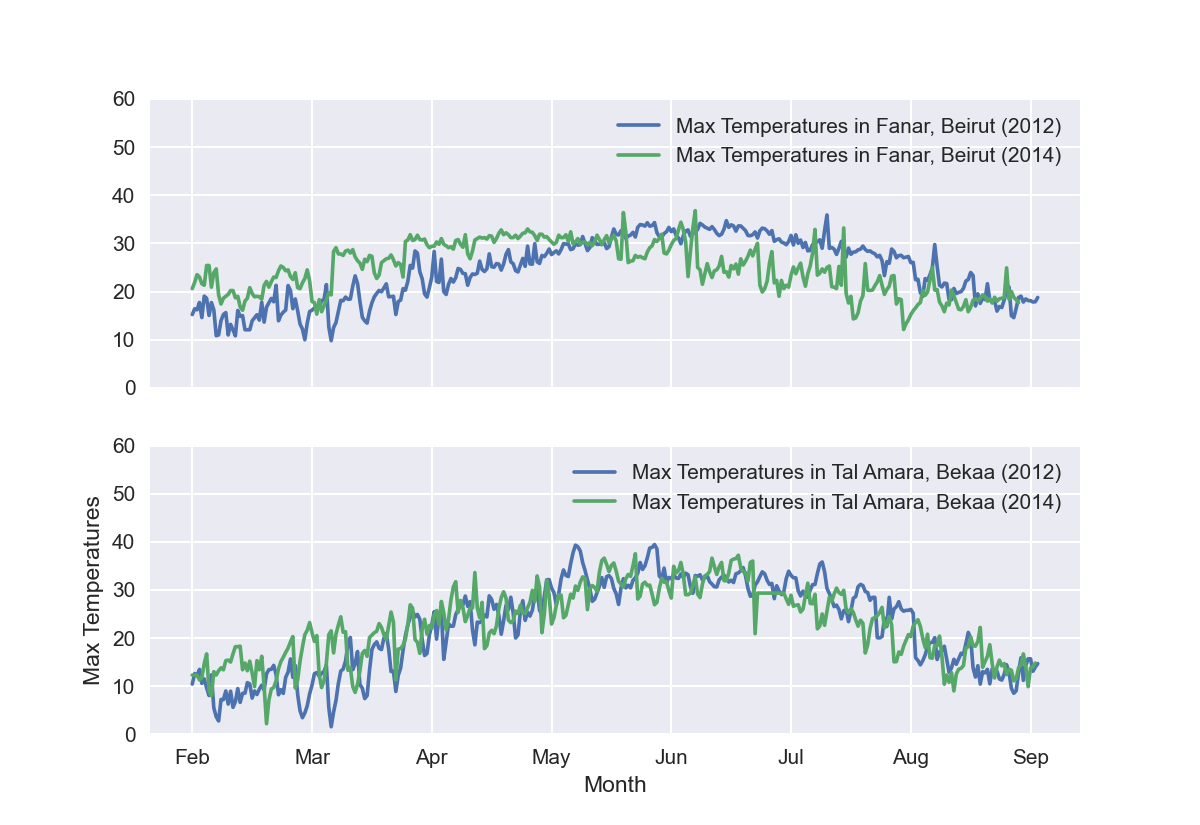

In [86]:
# plt.figure()
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True)
# fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True)
month_starts = [0,31,60,91,121,152,182,213,244,274,305,335]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 
# plt.gca().set_xticks(month_starts)
plt.gca().set_xticklabels(month_names)
plt.gca().set_ylim([0,60])
plt.xlabel('Month')
plt.ylabel('Max Temperatures')
ax[0].plot(df[(df['Year']==2012) & (df['Area']=='Fanar, Beirut')].reset_index().index, df[(df['Year']==2012) & (df['Area']=='Fanar, Beirut')]['Max Temperature'])
ax[0].plot(df[(df['Year']==2014) & (df['Area']=='Fanar, Beirut')].reset_index().index, df[(df['Year']==2014) & (df['Area']=='Fanar, Beirut')]['Max Temperature'])
ax[0].legend(['Max Temperatures in Fanar, Beirut (2012)', 'Max Temperatures in Fanar, Beirut (2014)'], loc=1)


ax[1].plot(df[(df['Year']==2012) & (df['Area']=='Tal Amara, Bekaa')].reset_index().index, df[(df['Year']==2012) & (df['Area']=='Tal Amara, Bekaa')]['Max Temperature'])
ax[1].plot(df[(df['Year']==2014) & (df['Area']=='Tal Amara, Bekaa')].reset_index().index, df[(df['Year']==2014) & (df['Area']=='Tal Amara, Bekaa')]['Max Temperature'])
ax[1].legend(['Max Temperatures in Tal Amara, Bekaa (2012)', 'Max Temperatures in Tal Amara, Bekaa (2014)'], loc=1)

# plt.plot(df[(df['Year']==2012) & (df['Area']=='Tal Amara, Bekaa')]['Date'], df[(df['Year']==2012) & (df['Area']=='Tal Amara, Bekaa')]['Precipitation [mm]'])

# # plt.gca().set_ylim(0, df['Precipitation [mm]'].max()+10)
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=True)

# ax1.plot(df[(df['Year']==2012) & (df['Area']=='Fanar, Beirut')]['Date'], df[(df['Year']==2012) & (df['Area']=='Fanar, Beirut')]['Precipitation [mm]'])
# ax1.plot(df[(df['Year']==2012) & (df['Area']=='Fanar, Beirut')]['Date'], df[(df['Year']==2012) & (df['Area']=='Fanar, Beirut')]['Average Temperature'])

# months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# plt.gca().set_xlabel(months)

# ax2.plot(df[(df['Year']==2014) & (df['Area']=='Fanar, Beirut')]['Date'], df[(df['Year']==2014) & (df['Area']=='Fanar, Beirut')]['Precipitation [mm]'])
# ax1.plot(df[(df['Year']==2014) & (df['Area']=='Fanar, Beirut')]['Date'], df[(df['Year']==2014) & (df['Area']=='Fanar, Beirut')]['Average Temperature'])


### It is pretty obvious that the maximum temperatures registered in both areas of Lebanon in 2014 were slightly higher than the ones recorded in 2012 at least for the first part of both years. In the second part of the year, the difference of temperatures is clearly seen in Fanar Beirut, where maximum temperatures in 2014 were lower than the ones in 2012. For Tal Amara, Bekaa, it's obvious that there is lower temperatures in 2014 than 2012, but not clearly visible as the ones in Fanar, Bekaa.

## Calculating average temperatures for both years into a new dataframe

In [106]:
avgDf = df.groupby(['MonthNbr', 'Day'])['Max Temperature'].mean()
avgDf = avgDf.reset_index()
avgDf['Date'] = avgDf['MonthNbr'].astype(str) + '-' + avgDf['Day'].astype(str)
avgDf = avgDf.sort_values(by='Date', ascending=True)
avgDf.head()

,MonthNbr,Day,Max Temperature,Date
0,1,1,10.030000,1-1
9,1,10,13.443333,1-10
10,1,11,13.660000,1-11
11,1,12,12.160000,1-12
12,1,13,11.598333,1-13


## Plotting Minimum temperatures

<IPython.core.display.Javascript object>


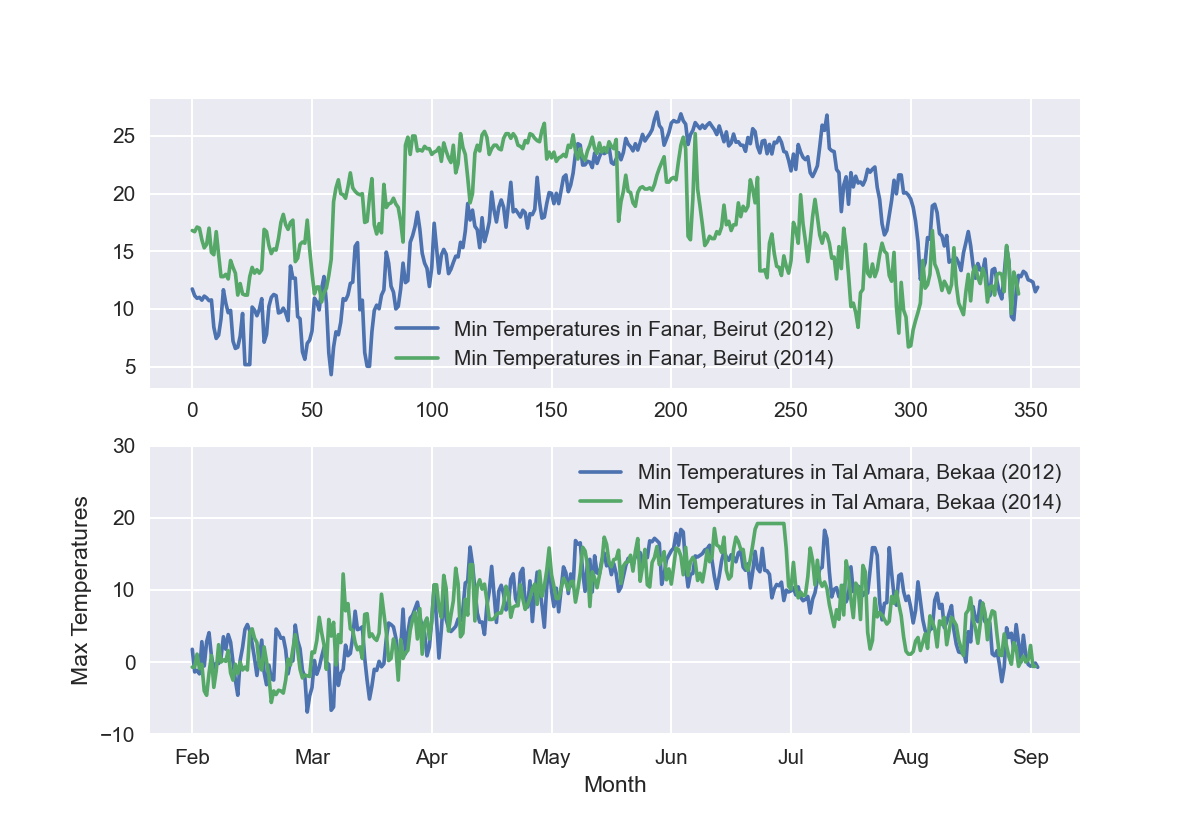

In [116]:
fig2, axs = plt.subplots(2)
month_starts = [0,31,60,91,121,152,182,213,244,274,305,335]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 
# plt.gca().set_xticks(month_starts)
plt.gca().set_xticklabels(month_names)
plt.gca().set_ylim([-10,30])
plt.xlabel('Month')
plt.ylabel('Max Temperatures')
axs[0].plot(df[(df['Year']==2012) & (df['Area']=='Fanar, Beirut')].reset_index().index, df[(df['Year']==2012) & (df['Area']=='Fanar, Beirut')]['Min Temperature'])
axs[0].plot(df[(df['Year']==2014) & (df['Area']=='Fanar, Beirut')].reset_index().index, df[(df['Year']==2014) & (df['Area']=='Fanar, Beirut')]['Min Temperature'])
axs[0].legend(['Min Temperatures in Fanar, Beirut (2012)', 'Min Temperatures in Fanar, Beirut (2014)'], loc=0)


axs[1].plot(df[(df['Year']==2012) & (df['Area']=='Tal Amara, Bekaa')].reset_index().index, df[(df['Year']==2012) & (df['Area']=='Tal Amara, Bekaa')]['Min Temperature'])
axs[1].plot(df[(df['Year']==2014) & (df['Area']=='Tal Amara, Bekaa')].reset_index().index, df[(df['Year']==2014) & (df['Area']=='Tal Amara, Bekaa')]['Min Temperature'])
axs[1].legend(['Min Temperatures in Tal Amara, Bekaa (2012)', 'Min Temperatures in Tal Amara, Bekaa (2014)'], loc=1)


### The behaviour in Fanar, Beirut for minimum temperature is following the same pattern of the maximum temperatures.
### Minimum temepratures in 2014 were higher than the ones registered in 2012.

### While for Tal Amara, Bekaa, minimum temperatures were nearly identical in some periods of time, and slightly different in other periods of time.

## Bottom Line: It is hard to tell from just data of 2 years, if the influence of climatic changes is somehow changing temperature ranges in Fanar, Beirut. But it is clearly seen that the temperatures in 2014 were higher than the ones in 2012 during the Autumn and Winter, and lower during the spring and the summer periods. That was not the case i Tal Amara, Bekaa.